<a href="https://colab.research.google.com/github/golf41101/Suchet/blob/master/DataScienceChallenge_SuchetReaboot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Show ideas in data science project**

In [ ]:
# for get the place name use geocoder
!pip install geocoder

In [ ]:
from sklearn import preprocessing
from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import numpy as np
import geocoder
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Question 1

### 1.1 Programmatically download and load into your favorite analytical tool the trip data for September 2015.


---


> download file from https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv



> upload to google drive



> set path and read file






In [ ]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
#set path
path ="/drive/MyDrive/Exam_sec_suchetreaboot/"

In [ ]:
# load green taxi 
df = pd.read_csv(path + "green_tripdata_2015-09.csv")

### 1.2 Report how many rows and columns of data you have loaded.

In [ ]:
# Report how many rows and columns of data you have loaded.
print("count of rows : ", df.shape[0])
print("count of columns : ", df.shape[1])

count of rows :  1494926
count of columns :  21


# Question 2

### Explore and Cleansing Data before plot histrogram


---


> Because I select Option C: seach in Question 5 I found abnormal data in lat-long pickup data which location is Soul Buoy (pacific ocean) then I decied to delete those data




In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# check null data
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

In [ ]:
# delete Ehail_fee variable because it have no data
df.drop(columns='Ehail_fee',inplace=True)

In [ ]:
# create columns pickup lat,long for drop abnormal data
df['lat,long'] = df['Pickup_latitude'].astype(str) + ',' + df['Pickup_longitude'].astype(str) 

In [ ]:
# lat long 0.0,0.0 is Soul Buoy that place is in the ocean so it impossible for pickup location then delete this values
df = df[df['lat,long']!='0.0,0.0']

In [ ]:
# after cleaned data
df.shape

(1492816, 21)

In [ ]:
# set picup and dropoff object type to datetime type 
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'])

In [ ]:
# create Hour, Day variables for calculation
df['Hour'] = df['lpep_pickup_datetime'].dt.strftime('%H')
df['Day'] = df['lpep_pickup_datetime'].dt.strftime('%d')

### 2.1 Plot a histogram of the number of the trip distance ("Trip Distance").

In [ ]:
# find columns name trip distance in dataframe
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type ', 'lat,long', 'Hour', 'Day'],
      dtype='object')



> Explore Trip distance variable



In [ ]:
df['Trip_distance'].describe()

count    1.492816e+06
mean     2.970418e+00
std      3.076780e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

In [ ]:
# set value to not show e
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
df['Trip_distance'].describe()

count   1492816.0000
mean          2.9704
std           3.0768
min           0.0000
25%           1.1000
50%           1.9800
75%           3.7400
max         603.1000
Name: Trip_distance, dtype: float64

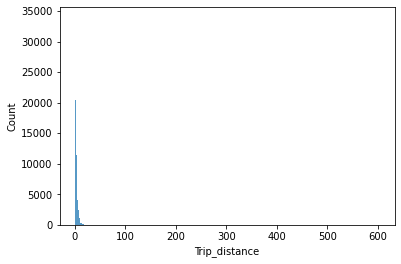

In [ ]:
ax = sns.histplot(data=df, x=df["Trip_distance"])
ax

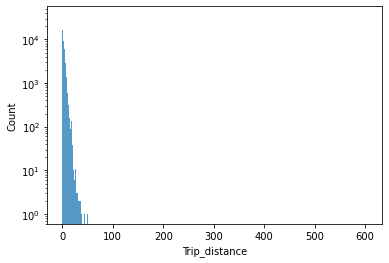

In [ ]:
ax_log = sns.histplot(df["Trip_distance"])
ax_log.set_yscale("log")

In [ ]:
print("skewness",df["Trip_distance"].skew())
print("kurtosis",df["Trip_distance"].kurtosis())

skewness 8.450053458307753
kurtosis 1023.6840438252528


In [ ]:
# from skewness and kurtosis have postive values

### 2.2 Report any structure you find and any hypotheses you have about that structure.


In [ ]:
df[['Tip_amount','Trip_distance']].corr()

,Tip_amount,Trip_distance
Tip_amount,1.0000,0.3928
Trip_distance,0.3928,1.0000


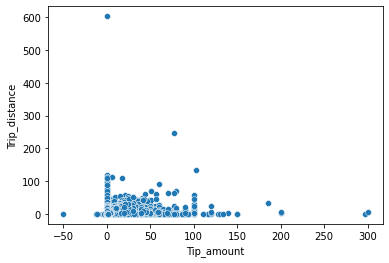

In [ ]:
ax_2 = sns.scatterplot(data=df, x=df['Tip_amount'], y=df['Trip_distance'])
ax_2

Tip amount and Trip distance have positive correlation

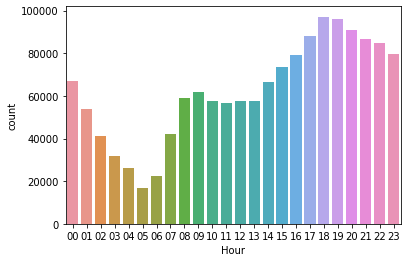

In [ ]:
ax_3 = sns.countplot(data=df, x=df['Hour'])
ax_3

Taxis are most commonly used in the evenings and late at night.(5 p.m.-11 p.m.)

Assumption main users group in this application

1.   office people
2.   party people



# Question 3

### 3.1 Report mean and median trip distance grouped by hour of day.

In [ ]:
# mean and median trip distance grouped by hour of day.
df.groupby('Hour').agg({'Trip_distance': ['mean', 'median']})

Trip_distance       
              mean median
Hour                     
00          3.1172 2.2000
01          3.0189 2.1300
02          3.0479 2.1400
03          3.2157 2.2100
04          3.5304 2.3600
05          4.1369 2.9000
06          4.0611 2.8500
07          3.2873 2.1800
08          3.0511 1.9800
09          3.0019 1.9700
10          2.9463 1.9200
11          2.9153 1.8800
12          2.9068 1.8900
13          2.8817 1.8500
14          2.8671 1.8300
15          2.8604 1.8100
16          2.7822 1.8000
17          2.6807 1.7800
18          2.6549 1.8000
19          2.7167 1.8500
20          2.7786 1.9000
21          3.0010 2.0300
22          3.1872 2.2000
23          3.1933 2.2200

## 3.2 We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In Data Dictionary RateCodeID can represent area of destination trip

> The final rate code in effect at the end of the trip.


1= Standard rate

1.   Standard rate
2.   JFK
3.   Newark
4.   Nassau or Westchester
5.   Negotiated fare
6.   Group ride


---
NYC area airports : JFK ,Newark,Nassau or Westchester
Reference : https://en.wikipedia.org/wiki/Aviation_in_the_New_York_metropolitan_area


In [ ]:
df['RateCodeID'].value_counts()

1     1453010
5       33317
2        4409
3        1114
4         925
6          35
99          6
Name: RateCodeID, dtype: int64

In [ ]:
# select rate code from area airports : JFK ,Newark,Nassau or Westchester
focus_area = [2,3,4]
focus_df = df[df['RateCodeID'].isin(focus_area)]
# transaction in area airports
print('transactions : ',focus_df.shape[0])

transactions :  6448


In [ ]:
# mean of fare amount and count of transaction by RatecodeID(area airports) 
focus_df.groupby('RateCodeID').agg({'Fare_amount': ['mean', 'count']})

Fare_amount      
                  mean count
RateCodeID                  
2              49.0279  4409
3              48.8757  1114
4              60.1649   925

In [ ]:
# mean of fare amount and count of transaction
focus_df.agg({'Fare_amount': ['mean', 'count'],'Tip_amount': ['mean', 'count']})

,Fare_amount,Tip_amount
mean,50.5993,4.5049
count,6448.0000,6448.0000


# Question 4

### 4.1 Build a derived variable for tip as a percentage of the total fare.

In [ ]:
# tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
# so create credit card dataframe for calculate tip per total fare from data dictionary : credit card type is 1 
cc_df = df[df['Payment_type']==1]

In [ ]:
cc_df['tip_per_total_fare'] = cc_df['Tip_amount'] / cc_df['Total_amount']

In [ ]:
cc_df[cc_df['tip_per_total_fare'].isnull()][['Tip_amount','tip_per_total_fare']]

,Tip_amount,tip_per_total_fare
14743,0.0000,NaN
16079,0.0000,NaN
18922,0.0000,NaN
22244,0.0000,NaN
25288,0.0000,NaN
...,...,...
1439137,0.0000,NaN
1442349,0.0000,NaN
1444373,0.0000,NaN
1462890,0.0000,NaN


In [ ]:
# Got Nan values because tip amount =0 
# I fix it by fill NaN by 0
cc_df['tip_per_total_fare'].fillna(0,inplace=True)

In [ ]:
# create non credit card dataframe for calculate non-credit card per total fare
non_cc_df = df[df['Payment_type']!=1]

In [ ]:
non_cc_df['tip_per_total_fare'] = non_cc_df['Tip_amount'] / non_cc_df['Total_amount']

### 4.2 Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700113 entries, 0 to 1494925
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               700113 non-null  int64         
 1   lpep_pickup_datetime   700113 non-null  datetime64[ns]
 2   Lpep_dropoff_datetime  700113 non-null  datetime64[ns]
 3   Store_and_fwd_flag     700113 non-null  object        
 4   RateCodeID             700113 non-null  int64         
 5   Pickup_longitude       700113 non-null  float64       
 6   Pickup_latitude        700113 non-null  float64       
 7   Dropoff_longitude      700113 non-null  float64       
 8   Dropoff_latitude       700113 non-null  float64       
 9   Passenger_count        700113 non-null  int64         
 10  Trip_distance          700113 non-null  float64       
 11  Fare_amount            700113 non-null  float64       
 12  Extra                  700113 non-null  flo

In [ ]:
#Trip type has null data

In [ ]:
# Convert category value to numberic value
cc_df=cc_df.replace(to_replace="N",value=1)
cc_df=cc_df.replace(to_replace="Y",value=2)

In [ ]:
cc_df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,"lat,long",Hour,Day,tip_per_total_fare
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,1,5,-73.9795,40.6850,-73.9794,40.6850,1,0.0000,7.8000,0.0000,0.0000,1.9500,0.0000,0.0000,9.7500,1,2.0000,"40.684955596923835,-73.97948455810547",00,01,0.2000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,1,5,-74.0108,40.9122,-74.0108,40.9122,1,0.0000,45.0000,0.0000,0.0000,0.0000,0.0000,0.0000,45.0000,1,2.0000,"40.91221618652344,-74.01079559326173",00,01,0.0000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,1,1,-73.9214,40.7667,-73.9144,40.7647,1,0.5900,4.0000,0.5000,0.5000,0.5000,0.0000,0.3000,5.8000,1,1.0000,"40.76670837402344,-73.92140960693358",00,01,0.0862
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,1,1,-73.9453,40.8082,-73.9377,40.8212,1,1.0700,5.5000,0.5000,0.5000,1.3600,0.0000,0.3000,8.1600,1,1.0000,"40.80818557739258,-73.94529724121094",00,01,0.1667
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,1,1,-73.8909,40.7464,-73.8769,40.7563,1,1.4300,6.5000,0.5000,0.5000,0.0000,0.0000,0.3000,7.8000,1,1.0000,"40.7464256286621,-73.89087677001953",00,01,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494915,1,2015-09-30 23:00:49,2015-09-30 23:23:45,1,1,-73.9900,40.6866,-73.9771,40.7493,1,4.8000,19.0000,0.5000,0.5000,4.0500,0.0000,0.3000,24.3500,1,1.0000,"40.686561584472656,-73.98996734619139",23,30,0.1663
1494916,1,2015-09-30 23:00:29,2015-09-30 23:20:19,1,1,-73.9579,40.7219,-73.9128,40.7801,1,5.5000,19.0000,0.5000,0.5000,4.0500,0.0000,0.3000,24.3500,1,1.0000,"40.72185134887695,-73.95793914794923",23,30,0.1663
1494920,1,2015-09-30 23:01:05,2015-09-30 23:19:14,1,1,-73.9963,40.6907,-73.9433,40.6842,1,3.5000,15.5000,0.5000,0.5000,4.2000,0.0000,0.3000,21.0000,1,1.0000,"40.69069290161133,-73.9963150024414",23,30,0.2000
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,1,1,-73.9536,40.5875,-73.9411,40.5908,1,0.8000,5.0000,0.5000,0.5000,1.2500,0.0000,0.3000,7.5500,1,1.0000,"40.58748245239258,-73.95360565185547",23,30,0.1656


In [ ]:
df_1 = cc_df.copy()

In [ ]:
# select columns for predict tip per fare amount model
# payment type =  1 
# from tip amount dictionary : This field is automatically populated for credit card tips. Cash tips are not included.
# delete vendor id,date time, lat long,payment type
df_1 = df_1.drop(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime','Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude','Payment_type','lat,long'],axis=1)

In [ ]:
df_1= df_1.astype('float64')

In [ ]:
df_1.isnull().sum()

Store_and_fwd_flag       0
RateCodeID               0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Trip_type                3
Hour                     0
Day                      0
tip_per_total_fare       0
dtype: int64

In [ ]:
# fill na value

df_1['Trip_type '].fillna(df_1['Trip_type '].mode()[0], inplace=True)

# tip per total fare เป็น Nan 
# from tip/total amount = 0/0 becaue tip amount = 0
df_1['tip_per_total_fare'].fillna(0,inplace=True)

In [ ]:
# check null again
df_1.isnull().sum()

Store_and_fwd_flag       0
RateCodeID               0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Trip_type                0
Hour                     0
Day                      0
tip_per_total_fare       0
dtype: int64

In [ ]:
corr_matrix = df_1.corr()

In [ ]:
# use absolute to found max correlation between tip per total fare 
corr_matrix['tip_per_total_fare'].abs().sort_values(ascending=False)

tip_per_total_fare      1.0000
Tip_amount              0.5717
MTA_tax                 0.1007
improvement_surcharge   0.0975
Trip_type               0.0974
RateCodeID              0.0926
Fare_amount             0.0740
Total_amount            0.0710
Trip_distance           0.0447
Hour                    0.0147
Extra                   0.0128
Day                     0.0110
Passenger_count         0.0097
Tolls_amount            0.0048
Store_and_fwd_flag      0.0020
Name: tip_per_total_fare, dtype: float64

In [ ]:
# select feature that have correlations with target variable >= 0.01

In [ ]:
corr_matrix = corr_matrix[corr_matrix['tip_per_total_fare'].abs() >= 0.01]

In [ ]:
corr_matrix.T.shape

(15, 12)

In [ ]:
col = corr_matrix.T.columns

In [ ]:
col

Index(['RateCodeID', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'improvement_surcharge', 'Total_amount', 'Trip_type ',
       'Hour', 'Day', 'tip_per_total_fare'],
      dtype='object')

In [ ]:
# use selected variable (variable which correlation with targer variable >= 0.01)
df_1 = df_1[col]

In [ ]:
print(df_1.shape)
display(df_1.head())

(700113, 12)


,RateCodeID,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,improvement_surcharge,Total_amount,Trip_type,Hour,Day,tip_per_total_fare
0,5.0000,0.0000,7.8000,0.0000,0.0000,1.9500,0.0000,9.7500,2.0000,0.0000,1.0000,0.2000
1,5.0000,0.0000,45.0000,0.0000,0.0000,0.0000,0.0000,45.0000,2.0000,0.0000,1.0000,0.0000
2,1.0000,0.5900,4.0000,0.5000,0.5000,0.5000,0.3000,5.8000,1.0000,0.0000,1.0000,0.0862
5,1.0000,1.0700,5.5000,0.5000,0.5000,1.3600,0.3000,8.1600,1.0000,0.0000,1.0000,0.1667
6,1.0000,1.4300,6.5000,0.5000,0.5000,0.0000,0.3000,7.8000,1.0000,0.0000,1.0000,0.0000


#### Prediction Regression Model for tip per total fare

In [ ]:
df_1.isnull().sum()

RateCodeID               0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
improvement_surcharge    0
Total_amount             0
Trip_type                0
Hour                     0
Day                      0
tip_per_total_fare       0
dtype: int64

In [ ]:
X = df_1.drop("tip_per_total_fare",axis=1)
y = df_1["tip_per_total_fare"]

In [ ]:
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

In [ ]:
df_1.describe()

,RateCodeID,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,improvement_surcharge,Total_amount,Trip_type,Hour,Day,tip_per_total_fare
count,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000,700113.0000
mean,1.0696,3.4459,14.1622,0.3567,0.4917,2.6341,0.2951,18.1172,1.0155,13.5854,15.7088,0.1415
std,0.5484,3.2795,10.6570,0.3624,0.0640,2.9532,0.0379,12.7996,0.1235,6.8976,8.4810,0.0782
min,1.0000,0.0000,-3.5000,-0.5000,-0.5000,-0.9600,-0.3000,-5.7600,1.0000,0.0000,1.0000,0.0000
25%,1.0000,1.2900,7.0000,0.0000,0.5000,1.1600,0.3000,9.9500,1.0000,9.0000,9.0000,0.1079
50%,1.0000,2.4100,11.0000,0.5000,0.5000,2.0000,0.3000,14.3000,1.0000,15.0000,16.0000,0.1667
75%,1.0000,4.4600,18.0000,0.5000,0.5000,3.3600,0.3000,22.4900,1.0000,19.0000,23.0000,0.1667
max,99.0000,246.2800,490.0000,1.0000,0.5000,300.0000,0.3000,497.5500,2.0000,23.0000,30.0000,1.0000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [ ]:
print(f'training features: {X_train.shape}')
print(f'training label: {y_train.shape}')
print(f'test features: {X_test.shape}')
print(f'test label: {y_test.shape}')

training features: (525084, 11)
training label: (525084,)
test features: (175029, 11)
test label: (175029,)


In [ ]:
# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
print('MSE of Linear Regression: %0.8f'% mse_reg)

# ridge regression
model_rid = Ridge()
model_rid.fit(X_train, y_train)
y_pred_rid = model_rid.predict(X_test)
mse_rid = mean_squared_error(y_test, y_pred_rid)
print('MSE of Ridge Regression : %0.8f'% mse_rid)

# lasso regression
model_las = linear_model.Lasso()
model_las.fit(X_train, y_train)
y_pred_las = model_las.predict(X_test)
mse_las = mean_squared_error(y_test, y_pred_las)
print('MSE of Lasso Regression: %0.8f'% mse_las)

# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred_dtr = regressor.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print('MSE of Decision Tree Regressor: %0.8f'% mse_dtr)

# Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)
mse_regr = mean_squared_error(y_test, y_pred_regr)
print('MSE of Random Forest Regressor: %0.8f'% mse_regr)

MSE of Linear Regression: 0.00292790
MSE of Ridge Regression : 0.00292790
MSE of Lasso Regression: 0.00602752
MSE of Decision Tree Regressor: 0.00000269
MSE of Random Forest Regressor: 0.00000130


#### Rescale Data before prediction

In [ ]:
# from input variable have many scale of unit such as Passenger_count,Trip_distance
# so scaling data can fix it

In [ ]:
# normalize features
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaler_x = scaler.fit(X_numpy.reshape(-1,11))
scaler_y = scaler.fit(y_numpy.reshape(-1,1))

In [ ]:
scaled_test_x = scaler_x.fit_transform(X_numpy.reshape(-1,11))
scaled_test_y = scaler_y.fit_transform(y_numpy.reshape(-1,1))

In [ ]:
scaled_data = np.concatenate((scaled_test_x,scaled_test_y),axis=1)

In [ ]:
df_scaled_data = pd.DataFrame(scaled_data, columns = df_1.columns)

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_test_x, scaled_test_y, test_size=0.25,random_state=42)

In [ ]:
print(f'training features: {X_train_sc.shape}')
print(f'training label: {y_train_sc.shape}')
print(f'test features: {X_test_sc.shape}')
print(f'test label: {y_test_sc.shape}')

training features: (525084, 11)
training label: (525084, 1)
test features: (175029, 11)
test label: (175029, 1)


In [ ]:
# calculate mse after rescale data and compare mse model between non-rescale data and scale data

print('calculate MSE Afrer inverse scale')

# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train_sc, y_train_sc)
y_pred_reg = model_reg.predict(X_test_sc)
inv_y_pred_reg = scaler_y.inverse_transform(y_pred_reg.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_reg = mean_squared_error(y_test_sc, inv_y_pred_reg)
print('MSE of Linear Regression: %0.8f'% (mse_reg))
#print(inv_y_pred_reg)

# ridge regression
model_rid = Ridge()
model_rid.fit(X_train_sc, y_train_sc)
y_pred_rid = model_rid.predict(X_test_sc)
inv_y_pred_rid = scaler_y.inverse_transform(y_pred_rid)
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_rid = mean_squared_error(y_test_sc, inv_y_pred_rid)
print('MSE of Ridge Regression: %0.8f'% (mse_rid))

# lasso regression
model_las = linear_model.Lasso()
model_las.fit(X_train_sc, y_train_sc)
y_pred_las = model_las.predict(X_test_sc)
inv_y_pred_las = scaler_y.inverse_transform(y_pred_las.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_las = mean_squared_error(y_test_sc, inv_y_pred_las)
print('MSE of Lasso Regression: %0.8f'% (mse_las))

# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_sc, y_train_sc)
y_pred_dtr = regressor.predict(X_test_sc)
inv_y_pred_dtr = scaler_y.inverse_transform(y_pred_dtr.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_dtr = mean_squared_error(y_test_sc, inv_y_pred_dtr)
print('MSE of Decision Tree Regressor: %0.8f'% (mse_dtr))

#Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_sc, y_train_sc)
y_pred_regr = regr.predict(X_test_sc)
inv_y_pred_regr = scaler_y.inverse_transform(y_pred_regr.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_regr = mean_squared_error(y_test_sc, inv_y_pred_regr)
print('MSE of Random Forest Regressor: %0.8f'% (mse_regr))

calculate MSE Afrer inverse scale
MSE of Linear Regression: 0.00292790
MSE of Ridge Regression: 0.00293383
MSE of Lasso Regression: 0.00602752
MSE of Decision Tree Regressor: 0.00000270
MSE of Random Forest Regressor: 0.00000130


#### There is no significant diferrent of mean sqaure error (mse) performance between non-rescale data model and scale data model.

---


So I pick scale data model to calculate the performance.




In [ ]:
# create list of model
list_mod = [model_reg,model_rid,model_las,regressor,regr]

In [ ]:
# r2 5cv
for i in list_mod:
  score_r2 = cross_val_score(i, scaled_test_x, scaled_test_y, scoring='r2',cv=5)
  score_r2.tolist()
  print(i,"%0.4f accuracy with a standard deviation of %0.4f" % (score_r2.mean(), score_r2.std()))

LinearRegression() 0.5266 accuracy with a standard deviation of 0.0384
Ridge() 0.5253 accuracy with a standard deviation of 0.0346
Lasso() -0.0002 accuracy with a standard deviation of 0.0002
DecisionTreeRegressor(random_state=0) 0.9986 accuracy with a standard deviation of 0.0007
RandomForestRegressor(random_state=0) 0.9991 accuracy with a standard deviation of 0.0007


In [ ]:
for i in list_mod:
  score_mse = cross_val_score(i, scaled_test_x, scaled_test_y, scoring='neg_mean_squared_error',cv=5)
  score_mse.tolist()
  print(i,"%0.8f accuracy with a standard deviation of %0.8f" % (score_mse.mean(), score_mse.std()))

LinearRegression() -0.00289124 accuracy with a standard deviation of 0.00021286
Ridge() -0.00289956 accuracy with a standard deviation of 0.00019176
Lasso() -0.00611401 accuracy with a standard deviation of 0.00015377
DecisionTreeRegressor(random_state=0) -0.00000837 accuracy with a standard deviation of 0.00000455
RandomForestRegressor(random_state=0) -0.00000570 accuracy with a standard deviation of 0.00000475


From performance of r2 and mse RandomForestRegressor perform the best model in this data set.

# Question 5 - Option C : Search

- We’re thinking about promoting ride sharing. Build a function that given point a point P, find the k trip origination points nearest P.

  - For this question, point P would be a taxi ride starting location picked by us at a given LAT-LONG.

- As an extra layer of complexity, consider the time for pickups, so this could eventually be used for real time ride sharing matching.

- Please explain not only how this can be computed, but how efficient your approach is (time and space complexity)

In [ ]:
# copy dataframe for calculation
df_pickup_lo = df.copy()

In [ ]:
#df_pickup_lo['lat,long'] = df_pickup_lo['Pickup_latitude'].astype(str) + ',' + df_pickup_lo['Pickup_longitude'].astype(str) 

In [ ]:
df_pickup_lo['lat,long'].value_counts()

40.721336364746094,-73.84429931640625    61
40.721336364746094,-73.84429168701173    55
40.721336364746094,-73.84431457519531    48
40.72132873535156,-73.84429168701173     46
40.721336364746094,-73.84427642822266    45
                                         ..
40.713035583496094,-73.97047424316406     1
40.694427490234375,-73.9945068359375      1
40.71739196777344,-73.95276641845702      1
40.80990982055664,-73.95890045166014      1
40.681350708007805,-73.96611022949219     1
Name: lat,long, Length: 1321688, dtype: int64

In [ ]:
pickup_lo = df_pickup_lo['lat,long'].value_counts().reset_index()

In [ ]:
pickup_lo = pickup_lo.rename(columns={"index": "lat,long", "lat,long": "count"})

In [ ]:
pickup_lo.describe()

,count
count,1321688.0000
mean,1.1295
std,0.6083
min,1.0000
25%,1.0000
50%,1.0000
75%,1.0000
max,61.0000


In [ ]:
pickup_lo.shape

(1321688, 2)

In [ ]:
pickup_lo['rank_count'] = pickup_lo['count'].rank(method='max', ascending=False)

In [ ]:
pickup_lo.groupby('rank_count')['lat,long'].count()

rank_count
1.0000                1
2.0000                1
3.0000                1
4.0000                1
5.0000                1
6.0000                1
7.0000                1
10.0000               3
11.0000               1
12.0000               1
15.0000               3
20.0000               5
25.0000               5
26.0000               1
28.0000               2
29.0000               1
32.0000               3
38.0000               6
42.0000               4
48.0000               6
49.0000               1
56.0000               7
63.0000               7
68.0000               5
84.0000              16
90.0000               6
102.0000             12
117.0000             15
129.0000             12
143.0000             14
159.0000             16
172.0000             13
194.0000             22
228.0000             34
272.0000             44
319.0000             47
421.0000            102
531.0000            110
696.0000            165
952.0000            256
1363.0000           411
2037.

### This data set has more than one million data so it take a lot runtimes so I decied to select only top 500 rank of count to calculation

In [ ]:
# select pickup location which top 500 lat long
pickup_lo = pickup_lo[pickup_lo['rank_count']<=500]

In [ ]:
pickup_lo

,"lat,long",count,rank_count
0,"40.721336364746094,-73.84429931640625",61,1.0000
1,"40.721336364746094,-73.84429168701173",55,2.0000
2,"40.721336364746094,-73.84431457519531",48,3.0000
3,"40.72132873535156,-73.84429168701173",46,4.0000
4,"40.721336364746094,-73.84427642822266",45,5.0000
...,...,...,...
416,"40.7179069519043,-73.95759582519531",12,421.0000
417,"40.72141647338867,-73.84429931640625",12,421.0000
418,"40.72137069702149,-73.84423828125",12,421.0000
419,"40.71371841430664,-73.82992553710938",12,421.0000


In [ ]:
focus_pickup_lo_list = pickup_lo['lat,long'].tolist()

In [ ]:
len(focus_pickup_lo_list)

421

In [ ]:
# get detail address from latitude and longtitude
address_pickup = []
street_pickup = []
for i in focus_pickup_lo_list :
    g = geocoder.osm(i, method='reverse')
    z = g.json['address'].split(',')
    for x in z:
        x = z[0]
    for y in z:
        y = z[1]
    address_pickup.append(x)
    street_pickup.append(y)

In [ ]:
pickup_lo['address'] = address_pickup
pickup_lo['street'] = street_pickup
pickup_lo['location'] = pickup_lo['address'] + pickup_lo['street']

In [ ]:
pickup_lo

,"lat,long",count,rank_count,address,street,location
0,"40.721336364746094,-73.84429931640625",61,1.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
1,"40.721336364746094,-73.84429168701173",55,2.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
2,"40.721336364746094,-73.84431457519531",48,3.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
3,"40.72132873535156,-73.84429168701173",46,4.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
4,"40.721336364746094,-73.84427642822266",45,5.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
...,...,...,...,...,...,...
416,"40.7179069519043,-73.95759582519531",12,421.0000,Bedford Av Subway Station L line,183,Bedford Av Subway Station L line 183
417,"40.72141647338867,-73.84429931640625",12,421.0000,107-50,Queens Boulevard,107-50 Queens Boulevard
418,"40.72137069702149,-73.84423828125",12,421.0000,The Vitamin Shoppe,Queens Boulevard,The Vitamin Shoppe Queens Boulevard
419,"40.71371841430664,-73.82992553710938",12,421.0000,Kew Gardens–Union Turnpike,Queens Boulevard,Kew Gardens–Union Turnpike Queens Boulevard


In [ ]:
# select only lat,long and location for mapping data
pickup_lo = pickup_lo[['lat,long','location']]

In [ ]:
df_focus_location = pd.merge(df_pickup_lo,pickup_lo,how='inner',on='lat,long')

In [ ]:
df_focus_location.shape

(7688, 24)

In [ ]:
df_focus_location.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type ', 'lat,long', 'Hour', 'Day', 'location'],
      dtype='object')

**In my opinion, the suitable passenger for ride sharing feature is a sole passenger and is using this feature in the nearless time with another passenger.**

---

There are Passenger_count,location_pickup,Hour,Day variables to consider

> The passenger is based on the assumption that Only one passenger count is interested in ride sharing program 
so filter passenger count == 1


> Criteria
  > passernger_count =1 
  > people have Day,Hour and location in the right time and the same place.



In [ ]:
df_focus_location = df_focus_location[df_focus_location['Passenger_count']==1]

In [ ]:
df_focus_location.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,"lat,long",Hour,Day,location
0,2,2015-09-01 00:09:53,2015-09-01 00:17:05,N,1,-73.8443,40.7214,-73.8128,40.7180,1,2.0700,9.0000,0.5000,0.5000,0.0000,0.0000,0.3000,10.3000,2,1.0000,"40.721378326416016,-73.84430694580078",00,01,107-50 Queens Boulevard
1,2,2015-09-02 08:43:20,2015-09-02 08:51:14,N,1,-73.8443,40.7214,-73.8223,40.7107,1,1.1900,7.5000,0.0000,0.5000,0.0000,0.0000,0.3000,8.3000,2,1.0000,"40.721378326416016,-73.84430694580078",08,02,107-50 Queens Boulevard
2,2,2015-09-06 23:27:09,2015-09-06 23:41:19,N,1,-73.8443,40.7214,-73.7738,40.6707,1,6.7100,20.5000,0.5000,0.5000,2.0000,0.0000,0.3000,23.8000,1,1.0000,"40.721378326416016,-73.84430694580078",23,06,107-50 Queens Boulevard
3,2,2015-09-10 17:58:30,2015-09-10 18:03:46,N,1,-73.8443,40.7214,-73.8531,40.7259,1,0.8700,5.5000,1.0000,0.5000,0.0000,0.0000,0.3000,7.3000,2,1.0000,"40.721378326416016,-73.84430694580078",17,10,107-50 Queens Boulevard
4,2,2015-09-10 20:51:22,2015-09-10 21:03:37,N,1,-73.8443,40.7214,-73.7754,40.7192,1,3.9800,14.0000,0.5000,0.5000,0.0000,0.0000,0.3000,15.3000,2,1.0000,"40.721378326416016,-73.84430694580078",20,10,107-50 Queens Boulevard


In [ ]:
final_location = df_focus_location.groupby(['Day','Hour','location'])['Passenger_count'].sum().sort_values(ascending=False).to_frame().reset_index()

In [ ]:
# chose Passenger_count in columns that have passenger_count >1 because more than 1 person is calling for a car during the same day, time and location
final_location = final_location[final_location['Passenger_count']>1]
# data on new opportunities for ride sharing programs.
print("total people who will use ride sharing program : ",final_location['Passenger_count'].sum(axis=0))
display(final_location)

total people who will use ride sharing program :  5055


,Day,Hour,location,Passenger_count
0,10,18,The Vitamin Shoppe Queens Boulevard,22
1,24,20,The Vitamin Shoppe Queens Boulevard,21
2,22,17,The Vitamin Shoppe Queens Boulevard,20
3,16,18,The Vitamin Shoppe Queens Boulevard,19
4,08,19,The Vitamin Shoppe Queens Boulevard,18
...,...,...,...,...
1120,29,18,107-50 Queens Boulevard,2
1121,12,01,Flushing-Main Street Main Street,2
1122,10,09,107-50 Queens Boulevard,2
1123,01,15,107-50 Queens Boulevard,2


**--- Thank You ---**

---


If you require any further information, feel free to contact me.